# **Proyecto 1 Algortimos Bio Inspirados de Luciérnaga**
# **Nombres:** Juan Tello, Juan Serrano y Naftaly Cruz

Iteración: 0
Mejor distancia en la iteración 0: 29.04476490341372
Iteración: 1
Mejor distancia en la iteración 1: 29.04476490341372
Iteración: 2
Mejor distancia en la iteración 2: 29.04476490341372
Iteración: 3
Mejor distancia en la iteración 3: 29.04476490341372
Iteración: 4
Mejor distancia en la iteración 4: 29.04476490341372
Iteración: 5
Mejor distancia en la iteración 5: 29.04476490341372
Iteración: 6
Mejor distancia en la iteración 6: 29.04476490341372
Iteración: 7
Mejor distancia en la iteración 7: 29.04476490341372
Iteración: 8
Mejor distancia en la iteración 8: 29.04476490341372
Iteración: 9
Mejor distancia en la iteración 9: 29.04476490341372
Iteración: 10
Mejor distancia en la iteración 10: 29.04476490341372
Iteración: 11
Mejor distancia en la iteración 11: 29.04476490341372
Iteración: 12
Mejor distancia en la iteración 12: 29.04476490341372
Iteración: 13
Mejor distancia en la iteración 13: 29.04476490341372
Iteración: 14
Mejor distancia en la iteración 14: 29.04476490341372


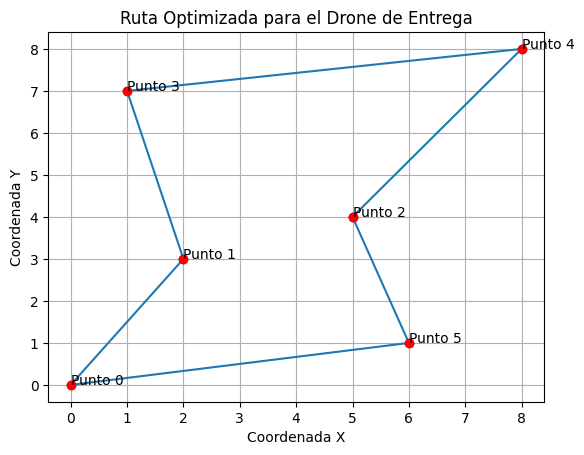

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del algoritmo de luciérnaga
n_luciernagas = 20  # Número de luciérnagas
max_iter = 100  # Número máximo de iteraciones
beta_0 = 1.0  # Atracción inicial
gamma = 1.0  # Coeficiente de absorción de luz
alpha = 0.2  # Paso aleatorio

# Coordenadas de las ubicaciones a visitar (ciudades)
locations = np.array([[0, 0], [2, 3], [5, 4], [1, 7], [8, 8], [6, 1]])
n_locations = locations.shape[0]

def distance(p1, p2):
    """
    Calcula la distancia euclidiana entre dos puntos.

    Parameters:
        p1 (numpy array): Coordenadas del primer punto [x, y].
        p2 (numpy array): Coordenadas del segundo punto [x, y].

    Returns:
        float: Distancia entre p1 y p2.
    """
    return np.linalg.norm(p1 - p2)

def objective(route):
    """
    Calcula la longitud total de una ruta que cubre todas las ubicaciones y regresa al punto de origen.

    Parameters:
        route (numpy array): Un arreglo que representa el orden de las ubicaciones a visitar.

    Returns:
        float: Distancia total de la ruta.
    """
    dist = 0
    for i in range(n_locations - 1):
        dist += distance(locations[route[i]], locations[route[i + 1]])
    dist += distance(locations[route[-1]], locations[route[0]])  # Volver al origen
    return dist

def initialize_fireflies(n_luciernagas, n_locations):
    """
    Inicializa las luciérnagas, donde cada luciérnaga representa una ruta aleatoria.

    Parameters:
        n_luciernagas (int): Número de luciérnagas (soluciones).
        n_locations (int): Número de ubicaciones a visitar.

    Returns:
        numpy array: Matriz donde cada fila es una luciérnaga que representa una ruta.
    """
    fireflies = np.zeros((n_luciernagas, n_locations), dtype=int)
    for i in range(n_luciernagas):
        fireflies[i] = np.random.permutation(n_locations)
    return fireflies

def move_firefly(firefly_i, firefly_j, beta, alpha):
    """
    Actualiza la ruta de una luciérnaga i en dirección a otra luciérnaga j más brillante.

    Parameters:
        firefly_i (numpy array): Ruta actual de la luciérnaga i.
        firefly_j (numpy array): Ruta de la luciérnaga j más brillante.
        beta (float): Factor de atracción entre luciérnagas.
        alpha (float): Parámetro de aleatoriedad para introducir variabilidad en las rutas.

    Returns:
        numpy array: Nueva ruta de la luciérnaga i después del movimiento.
    """
    new_route = firefly_i.copy()
    for i in range(len(firefly_i)):
        if np.random.rand() < beta:
            new_route[i], new_route[(i+1)%n_locations] = new_route[(i+1)%n_locations], new_route[i]  # intercambio
    # Paso aleatorio
    if np.random.rand() < alpha:
        i, j = np.random.choice(len(firefly_i), size=2, replace=False)
        new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

def firefly_algorithm():
    """
    Implementa el algoritmo de luciérnaga para optimizar la ruta de un drone.

    Las luciérnagas representan soluciones (rutas) y se mueven hacia soluciones más brillantes (rutas más cortas).

    Returns:
        best_route (numpy array): La mejor ruta encontrada.
        best_distance (float): La distancia de la mejor ruta.
    """
    fireflies = initialize_fireflies(n_luciernagas, n_locations)
    best_route = None
    best_distance = float('inf')

    for iteration in range(max_iter):
        print(f"Iteración: {iteration}")
        for i in range(n_luciernagas):
            for j in range(n_luciernagas):
                if objective(fireflies[j]) < objective(fireflies[i]):
                    beta = beta_0 * np.exp(-gamma * distance(locations[fireflies[i][0]], locations[fireflies[j][0]])**2)
                    fireflies[i] = move_firefly(fireflies[i], fireflies[j], beta, alpha)

        # Actualizar la mejor solución encontrada
        for i in range(n_luciernagas):
            current_distance = objective(fireflies[i])
            if current_distance < best_distance:
                best_distance = current_distance
                best_route = fireflies[i]

        print(f"Mejor distancia en la iteración {iteration}: {best_distance}")

    return best_route, best_distance

def plot_route(route):
    """
    Grafica la mejor ruta encontrada por el algoritmo de luciérnaga.

    Parameters:
        route (numpy array): La ruta a graficar, que es una permutación de los índices de las ubicaciones.
    """
    route_with_return = np.append(route, route[0])
    plt.plot(locations[route_with_return, 0], locations[route_with_return, 1], 'o-', label='Ruta Optimizada')
    plt.plot(locations[:, 0], locations[:, 1], 'ro')
    for i in range(n_locations):
        plt.text(locations[i, 0], locations[i, 1], f'Punto {i}')
    plt.title("Ruta Optimizada para el Drone de Entrega")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(True)
    plt.show()

# Ejecutar el algoritmo de luciérnaga
best_route, best_distance = firefly_algorithm()
print(f"Mejor ruta encontrada: {best_route}, con una distancia total de: {best_distance}")

# Visualizar la mejor ruta
plot_route(best_route)